In [60]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

from testCases import *
from dnn_utils import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.random.seed(1)

In [61]:
def initialize_parameters_deep(layer_dims):
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)
    
    for l in range(1, L):
#         for w
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l - 1]) / np.sqrt(layer_dims[l-1])
#         for b
        parameters['b'+ str(l)] = np.zeros((layer_dims[l], 1))
    
#     validate
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l - 1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l],1))
    
    return parameters

In [62]:
parameters = initialize_parameters_deep([5,4,3])
print("W1 =" + str(parameters["W1"]))
print("b1 =" + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 =[[ 0.72642933 -0.27358579 -0.23620559 -0.47984616  0.38702206]
 [-1.0292794   0.78030354 -0.34042208  0.14267862 -0.11152182]
 [ 0.65387455 -0.92132293 -0.14418936 -0.17175433  0.50703711]
 [-0.49188633 -0.07711224 -0.39259022  0.01887856  0.26064289]]
b1 =[[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.55030959  0.57236185  0.45079536  0.25124717]
 [ 0.45042797 -0.34186393 -0.06144511 -0.46788472]
 [-0.13394404  0.26517773 -0.34583038 -0.19837676]]
b2 = [[0.]
 [0.]
 [0.]]


In [63]:
print(parameters)

{'W1': array([[ 0.72642933, -0.27358579, -0.23620559, -0.47984616,  0.38702206],
       [-1.0292794 ,  0.78030354, -0.34042208,  0.14267862, -0.11152182],
       [ 0.65387455, -0.92132293, -0.14418936, -0.17175433,  0.50703711],
       [-0.49188633, -0.07711224, -0.39259022,  0.01887856,  0.26064289]]), 'b1': array([[0.],
       [0.],
       [0.],
       [0.]]), 'W2': array([[-0.55030959,  0.57236185,  0.45079536,  0.25124717],
       [ 0.45042797, -0.34186393, -0.06144511, -0.46788472],
       [-0.13394404,  0.26517773, -0.34583038, -0.19837676]]), 'b2': array([[0.],
       [0.],
       [0.]])}


In [64]:
def linear_forward(A, W, b):
    Z = np.dot(W,A) + b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z,cache

In [65]:
A, W, b = linear_forward_test_case()
Z, linear_cache = linear_forward(A, W, b)
print("Z = " + str(Z))

Z = [[ 3.26295337 -1.23429987]]


In [66]:
def linear_activation_forward(A_prev, W, b, activation):
    Z, linear_cache = linear_forward(A_prev, W, b)
    
    if activation == "sigmoid": # 如果该层使用sigmoid        
        A = sigmoid(Z) 
    elif activation == "relu":
        A = relu(Z)
        
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, Z) # 缓存一些变量，后面的反向传播会用到它们

    return A, cache

In [67]:
A_prev, W, b = linear_activation_forward_test_case()

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(A))

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print("With ReLU: A = " + str(A))

With sigmoid: A = [[0.96890023 0.11013289]]
With ReLU: A = [[3.43896131 0.        ]]


In [68]:
def L_model_forward(X, parameters):
    
    caches = []
    A = X
    
    L = len(parameters) // 2
    
    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev, 
                                            parameters['W'+str(l)],
                                            parameters['b'+str(l)],
                                            activation ='relu')
        caches.append(cache)
        
    AL, cache = linear_activation_forward(A,
                                         parameters['W' + str(L)], 
                                         parameters['b' + str(L)], 
                                         activation='sigmoid')
    
    caches.append(cache)
    
    assert(AL.shape == (1, X.shape[1]))
    
    return AL,caches

In [69]:
X, parameters = L_model_forward_test_case()
AL, caches = L_model_forward(X, parameters)
print("AL = " + str(AL))
print("Length of caches list = " + str(len(caches)))

AL = [[0.17007265 0.2524272 ]]
Length of caches list = 2


In [70]:
def compute_cost(AL,Y):
    
    m = Y.shape[1]
    cost = (-1 / m) * np.sum(np.multiply(Y, np.log(AL)) + np.multiply(1 - Y, np.log(1 - AL)))
    
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    return cost

In [71]:
Y, AL = compute_cost_test_case()

print("cost = " + str(compute_cost(AL, Y)))

cost = 0.41493159961539694


In [72]:
def linear_backward(dZ, cache):
    
    A_prev, W, b = cache
    m =A_prev.shape[1]
    
    dW = np.dot(dZ, cache[0].T) / m
    db = np.sum(dZ, axis=1, keepdims=True) / m
    dA_prev = np.dot(cache[1].T, dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [73]:
dZ, linear_cache = linear_backward_test_case()
dA_prev, dW, db = linear_backward(dZ, linear_cache)
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

dA_prev = [[ 0.51822968 -0.19517421]
 [-0.40506361  0.15255393]
 [ 2.37496825 -0.89445391]]
dW = [[-0.10076895  1.40685096  1.64992505]]
db = [[0.50629448]]


In [74]:
def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db    

In [75]:
dAL, linear_activation_cache = linear_activation_backward_test_case()

dA_prev, dW, db = linear_activation_backward(dAL, linear_activation_cache, activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

dA_prev, dW, db = linear_activation_backward(dAL, linear_activation_cache, activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))


sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]

relu:
dA_prev = [[ 0.44090989 -0.        ]
 [ 0.37883606 -0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = [[-0.20837892]]


In [76]:
def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches)
    Y = Y.reshape(AL.shape)
    
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    current_cache = caches[-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(
                                                                                            dAL, 
                                                                                            current_cache,
                                                                                            activation = "sigmoid")
    
    for c in reversed(range(1, L)):
        
        grads["dA"+str(c-1)], grads["dW" + str(c)], grads["db"+str(c)] = linear_activation_backward(
            grads["dA" + str(c)], 
            caches[c-1],
            activation = "relu")
        
    return grads        

In [77]:
AL, Y_assess, caches = L_model_backward_test_case()
grads = L_model_backward(AL, Y_assess, caches)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dA1 = "+ str(grads["dA1"]))

dW1 = [[0.41010002 0.07807203 0.13798444 0.10502167]
 [0.         0.         0.         0.        ]
 [0.05283652 0.01005865 0.01777766 0.0135308 ]]
db1 = [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]
dA1 = [[ 0.12913162 -0.44014127]
 [-0.14175655  0.48317296]
 [ 0.01663708 -0.05670698]]


In [78]:
parameters

{'W1': array([[ 0.3190391 , -0.24937038,  1.46210794, -2.06014071],
        [-0.3224172 , -0.38405435,  1.13376944, -1.09989127],
        [-0.17242821, -0.87785842,  0.04221375,  0.58281521]]),
 'b1': array([[-1.10061918],
        [ 1.14472371],
        [ 0.90159072]]),
 'W2': array([[ 0.50249434,  0.90085595, -0.68372786]]),
 'b2': array([[-0.12289023]])}

In [79]:
parameters['b2']

array([[-0.12289023]])

In [80]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2
     
    for l in range(1, L+1):
        parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate * grads["dW" + str(l)]
        parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate * grads["db" + str(l)]
        
    return parameters

In [81]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = " + str(parameters["W1"]))
print ("b1 = " + str(parameters["b1"]))
print ("W2 = " + str(parameters["W2"]))
print ("b2 = " + str(parameters["b2"]))

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


In [82]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

m_train = train_x_orig.shape[0] # 训练样本的数量
m_test = test_x_orig.shape[0] # 测试样本的数量
num_px = test_x_orig.shape[1] # 每张图片的宽/高

train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T 

train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

In [98]:
def dnn_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost= False):
    np.random.seed(1)
    costs = []
    
    parameters = initialize_parameters_deep(layers_dims)
    
    for i in range(0, num_iterations):
        AL, caches = L_model_forward(X, parameters)
        
        cost = compute_cost(AL,Y)
        
        grads = L_model_backward(AL, Y, caches)
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if i % 100 == 0:
            if print_cost and i >0:
                print("训练%i次后成本是: %f" % (i, cost))
            costs.append(cost)
        
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
        
    return parameters

训练100次后成本是: 0.672053
训练200次后成本是: 0.648263
训练300次后成本是: 0.611507
训练400次后成本是: 0.567047
训练500次后成本是: 0.540138
训练600次后成本是: 0.527930
训练700次后成本是: 0.465477
训练800次后成本是: 0.369126
训练900次后成本是: 0.391747
训练1000次后成本是: 0.315187
训练1100次后成本是: 0.272700
训练1200次后成本是: 0.237419
训练1300次后成本是: 0.199601
训练1400次后成本是: 0.189263
训练1500次后成本是: 0.161189
训练1600次后成本是: 0.148214
训练1700次后成本是: 0.137775
训练1800次后成本是: 0.129740
训练1900次后成本是: 0.121225


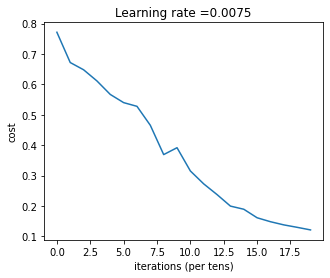

In [99]:
layers_dims = [12288, 20, 7, 5, 1]
parameters = dnn_model(train_x, train_y, layers_dims, num_iterations = 2000, print_cost = True)

In [100]:
def predict(X,parameters):   
    m = X.shape[1]
    n = len(parameters) // 2 
    p = np.zeros((1,m))
    

    probas, caches = L_model_forward(X, parameters)
   
    
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
        
    return p

In [101]:
pred_train = predict(train_x,parameters)
print("预测准确率是: "  + str(np.sum((pred_train == train_y) / train_x.shape[1])))

预测准确率是: 0.9808612440191385


In [102]:
# 对测试数据集进行预测
pred_test = predict(test_x,parameters)
print("预测准确率是: "  + str(np.sum((pred_test == test_y) / test_x.shape[1])))

预测准确率是: 0.8
